# Text Cleaning
- https://katacoda.com/basiafusinska/courses/nlp-with-python/text-cleaning

In [1]:
import nltk
nltk.download("movie_reviews", quiet=True)
#from nltk.corpus import movie_reviews

def load_movie_reviews():

    # movie_reviews is a sizeable corpus to import, so only load it if we have to
    from nltk.corpus import movie_reviews
    try:
        movie_reviews.categories()
    except:
        import nltk
        print('This appears to be your first time using the NLTK Movie Reviews corpus. We will first download the necessary corpus (this is a one-time download that might take a little while')
        nltk.download('movie_reviews')
        from nltk.corpus import movie_reviews

    raw_data = []

    # NLTK's corpus is structured in an interesting way
    # first iterate through the two categories (pos and neg)
    for category in movie_reviews.categories():

        if category == 'pos':
            pretty_category_name = 'positive'
        elif category == 'neg':
            pretty_category_name = 'negative'

        # each of these categories is just fileids, so grab those
        for fileid in movie_reviews.fileids(category):

            # then each review is a NLTK class where each item in that class instance is a word
            review_words = movie_reviews.words(fileid)
            review_text = ''

            for word in review_words:
                review_text += ' ' + word

            review_dictionary = {
                'text': review_text,
                'sentiment': pretty_category_name
            }

            raw_data.append(review_dictionary)

    return raw_data 

documents=load_movie_reviews()



In [2]:
assert len(documents) == 2000

In [3]:
example_idx = 75
document = documents[example_idx]
document

{'text': ' it was with great anticipation that i sat down to view braveheart last week as it premiered on american cable . the academy award winning film had been highly acclaimed . it also featured the music of one of my favorite film composers , james horner . what i was in for was a disappointing and overlong film which was anything but the best picture of 1995 . what drags braveheart down is its screenplay . it abounds with high production values : john toll \' s award - winning cinematography ( which also graced edward zwick \' s 1994 legends of the fall ) , a gorgeous score by horner , and the sort of logistics that make you wish assistant directors were household names . but this does not save a misguided script . the film wishes to paint its central character as a hero , but the viewer \' s only response to his " heroism " is intellectual : william wallace ( producer - director mel gibson ) is fighting for freedom and against tyranny , so we have to root for him . but wallace \

In [4]:
_doc_lengths = [len(document['text']) for document in documents]


In [5]:
import pandas as pd

In [6]:
doc_lengths =pd.Series(_doc_lengths)
doc_lengths.describe()

count     2000.0000
mean      3905.2600
std       1718.6621
min         92.0000
25%       2746.5000
50%       3641.5000
75%       4731.5000
max      15098.0000
dtype: float64

In [7]:
doc_lengths[:10]

0    4062
1    1383
2    2859
3    2984
4    4441
5    3889
6    3385
7    3612
8    4571
9    4575
dtype: int64

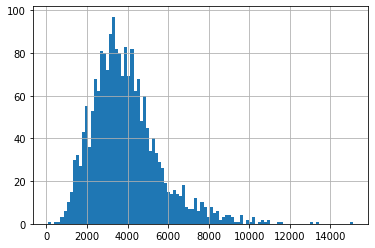

In [8]:
doc_lengths.hist(bins=100)

In [9]:
_word_lengths = [len(document['text'].split()) for document in documents]

In [10]:
word_lengths =pd.Series(_word_lengths)
word_lengths.describe()

count    2000.000000
mean      791.910000
std       347.338096
min        19.000000
25%       560.000000
50%       745.000000
75%       957.250000
max      2879.000000
dtype: float64

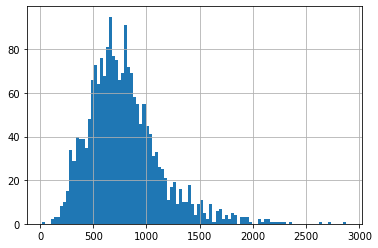

In [11]:
word_lengths.hist(bins=100)

In [25]:
from collections import defaultdict
word_counts = defaultdict(int)

In [26]:
for words in [document['text'].split() for document in documents]:
    for word in words:
        word_counts[word] += 1

In [28]:
from collections import Counter

In [29]:
words_counter=Counter(word_counts)

In [33]:
words_counter.most_common(20)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595),
 (')', 11781),
 ('(', 11664),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961)]

In [34]:
import re

In [36]:
pattern= re.compile('^[a-zA-Z]{2,}$')